# Testing the model with sample images


In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image # type: ignore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL.Image')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [ ]:

def preprocess_image(img_path, target_size=(224, 224)):
    """Preprocess the image for MobileNetV2"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0  
    return img_array


In [95]:
def predict_image(model_path, img_path, class_indices):
    """Make prediction on a single image"""
    
    model = tf.keras.models.load_model(model_path)
    
   
    img_array = preprocess_image(img_path)
    
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    
  
    class_names = {v: k for k, v in class_indices.items()}
    predicted_class_name = class_names[predicted_class]
    
    access = "Access Granted" if (predicted_class_name == 'car' or predicted_class_name =='scooter' and confidence >0.85 ) else "Access Denied"
    green = True if access == "Access Granted" else False
    
    img = image.load_img(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    
    plt.title(access +f"\n Predicted: {predicted_class_name} ({confidence:.2%})", fontsize=20, color='green' if green else 'red')
    
    plt.grid(False)
    
    plt.axis('off')
    plt.show()

    return predicted_class_name, confidence
    

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


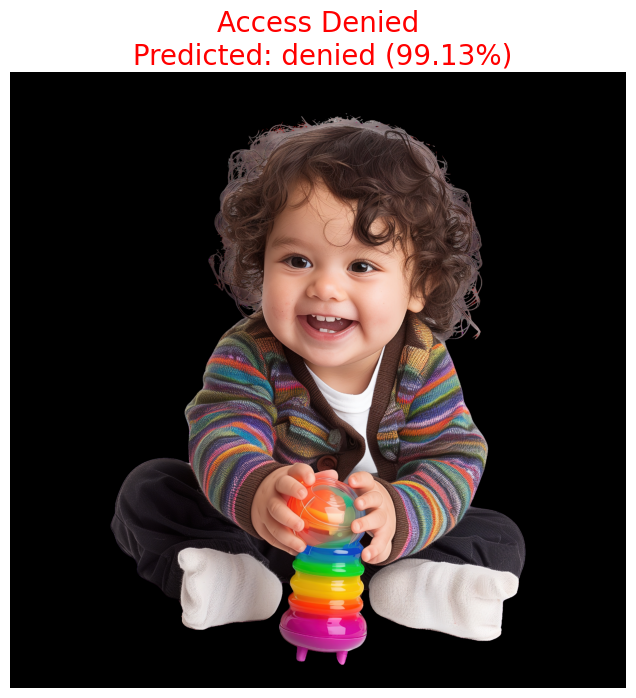


Prediction Results:
Class: denied
Confidence: 99.13%


In [97]:
model_path = 'mobilenet_classifier.keras'
    
    
class_indices = {'car': 0, 'denied': 1, 'scooter': 2}


test_image_path = 'test/test2.png'  # Fixed path

if not os.path.exists(test_image_path):
    print(f"Error: Image file not found at {test_image_path}")
    print("Please make sure the test image exists in the 'test' directory")
else:
    try:
        predicted_class, confidence = predict_image(model_path, test_image_path, class_indices)
        print(f"\nPrediction Results:")
        print(f"Class: {predicted_class}")
        print(f"Confidence: {confidence:.2%}")
        
    except Exception as e:
        print(f"Error during prediction: {str(e)}")